# PDF of the Log

1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

/Users/federicoastori/opt/anaconda3/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


mean of log of x = 0.70812
 mean of y = 0.59144
 median of log of x = 0.71248
 median of y = 0.71248


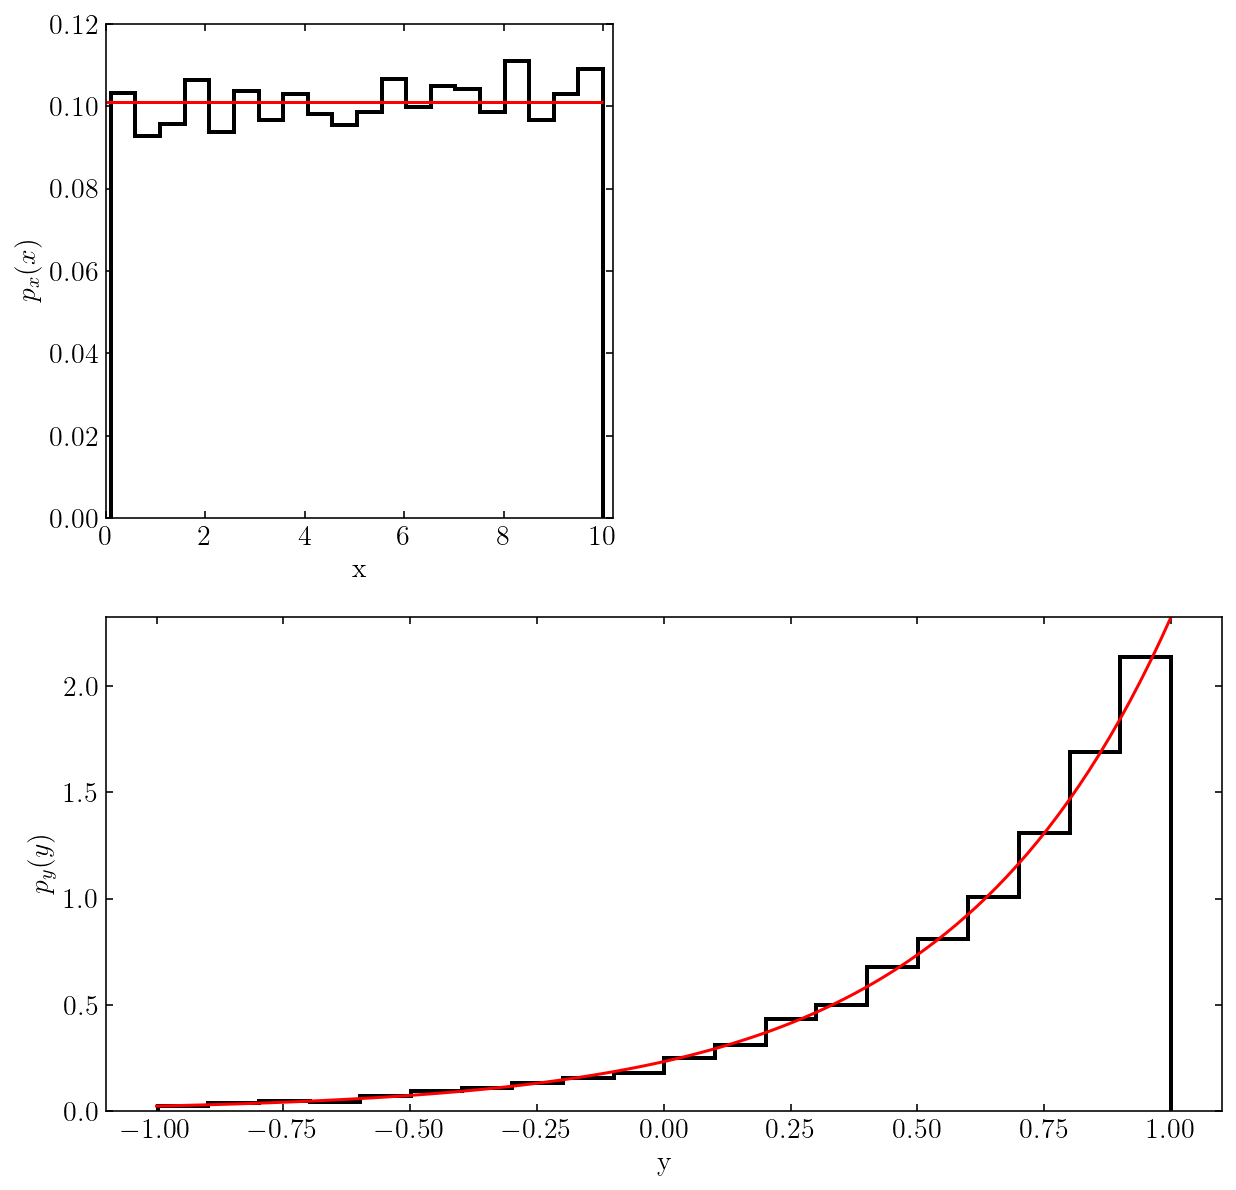

In [15]:
N=10000

x=np.random.uniform(0.1,10,N)

plt.figure(figsize=[10,10])

plt.subplot(221)
plt.hist(x,bins=20, fill=False, density=True,histtype='step',lw=2, color='black' )
pdf_x=1/(10-0.1)
plt.hlines(pdf_x,0,10, colors='red')
plt.xlabel('x')
plt.ylabel('$p_x(x)$')
plt.ylim(0,0.12)
plt.xlim(0,10.2)

#plt.hlines(np.mean(x), 0,10, colors='red', label='mean')
#plt.hlines(np.median(x), 0,10, colors='blue', label='median')
#plt.legend(loc='best')

y=np.log10(x)

def pdf_y(y):
    return (10**y)*np.log(10)*(1/9.9)

plt.subplot(212)
plt.hist(y,bins=20, fill=False, density=True, histtype='step',lw=2, color='black')
y_grid=np.linspace(-1,1,100)
plt.plot(y_grid,pdf_y(y_grid), c='red')
plt.xlabel('y')
plt.ylabel('$p_y(y)$')
plt.xlim(-1.1,1.1)

mean_log_x=np.log10(np.mean(x))
mean_y=np.mean(y)

median_log_x=np.log10(np.median(x))
median_y=np.median(y)

print('mean of log of x = %1.5f\n mean of y = %1.5f\n median of log of x = %1.5f\n median of y = %1.5f' % (mean_log_x, mean_y, median_log_x, median_y))

